In [1]:
import pandas as pd
import numpy as np

# The dataset is obtained from a local directory
data_url = "https://raw.githubusercontent.com/mrzeynalli/data-analytics/main/IMDb%20Top%201000%20Movies%20Analysis/Datasets/imdb_top_1000.csv"
imdb_dataset = pd.read_csv(data_url)

Getting rid of columns not used in research

In [2]:
# The columns that we perceive as redundant are eliminated to simplify the procedures
imdb_dataset = imdb_dataset.drop(columns=['Poster_Link','Certificate','Overview','Director','Star1','Star2','Star3','Star4'])

Checking for missing values

In [3]:
imdb_nulls = 0
for i in imdb_dataset['IMDB_Rating']:
    if pd.isnull(i):
        imdb_nulls +=1
# Above integer sums up the number of null values in IMDB_Rating column

metascore_nulls = 0
for i in imdb_dataset['Meta_score']:
    if pd.isnull(i):
        metascore_nulls +=1
# Above integer sums up the number of null values in Meta_score column

print(f"""
The number of null IMDB values is {imdb_nulls}
The number of null metascore values is {metascore_nulls}
""")

# The process shows that IMDB_Rating column does not have any missing values, whereas Meta_score columns has 157 missing values


The number of null IMDB values is 0
The number of null metascore values is 157



Creating a dataset specifically about genres of the movies in the given data

In [4]:
# an independent list that contains unique genre names
genre_list = list(imdb_dataset['Genre'].unique())

# an independent list that contains the count of genres
genre_counts = list(imdb_dataset.value_counts('Genre'))

In [5]:
import statistics as stat

average_IMDB_rating = round(np.average(imdb_dataset['IMDB_Rating']),2)

nonnull_metascores = []
for metascore in imdb_dataset['Meta_score']:
    if not pd.isnull(metascore):
        nonnull_metascores.append(metascore)
# In order to calculate the average metascore, we need a seperate list that contains the nonnull elements
    
average_metascore = round(np.average(nonnull_metascores),0)
mode_metascore = stat.mode(nonnull_metascores)
median_metascore = stat.median(nonnull_metascores)
# To replace the missing values, we tended to calculate mean, mode, and median metascores

print(f"""
The average metascore is {average_metascore}
The mode metascore is {mode_metascore}
The median metascore is {median_metascore}
""")


The average metascore is 78.0
The mode metascore is 76.0
The median metascore is 79.0



In [6]:
# After calculting mean, mode, and median metascore, we decided to use the mean as it is the most moderate value

imdb_dataset['Meta_score'].fillna(average_metascore, inplace= True)
nulls_after = 0
for i in imdb_dataset['Meta_score']:
    if pd.isnull(i):
        nulls_after +=1

In [7]:
# These functions create a seperate list containing the IMDB or Metascore values for one specific genre

def create_imdb_rating_list(genre_name):
    ratings_list =[]
    
    filtered_dataframe = imdb_dataset.loc[imdb_dataset['Genre'] == genre_name]
    # filtered_dataframe is a dataframe object that contains a filteres dataset for the chosen genre
    
    filtered_series = filtered_dataframe['IMDB_Rating']
    # filtered_series is a series object that contains the IMDB ratings for the genre that filteres in the filtered_dataframe object
    
    ratings_list = list(filtered_series)
    return ratings_list


def create_metascore_rating_list(genre_name):
    ratings_list =[]
    
    filtered_dataframe = imdb_dataset.loc[imdb_dataset['Genre'] == genre_name]
    # filtered_dataframe is a dataframe object that contains a filteres dataset for the chosen genre
    
    filtered_series = filtered_dataframe['Meta_score']
    # filtered_series is a series object that contains the Metascore ratings for the genre that filteres in the filtered_dataframe object
    
    ratings_list = list(filtered_series)
    return ratings_list

In [8]:
# Here we created dictionaries that has a key as a genre name and the corresposing value as 
# average rating, either IMDB or Metascore, for that genre

genre_and_avg_imdb_rating = {}

for genre in genre_list:
    genre_and_avg_imdb_rating[genre] = round(np.average(create_imdb_rating_list(genre)),2)

    
genre_and_avg_metascore_rating = {}

for genre in genre_list:
    genre_and_avg_metascore_rating[genre] = round(np.average(create_metascore_rating_list(genre)),0)

In [9]:
# Here we created a list that stores the difference between the average IMDB rating for a specific genre and that for all movies in the dataset

imdb_rating_differences = []

for rating in genre_and_avg_imdb_rating.values():
    difference = rating - average_IMDB_rating
    imdb_rating_differences.append(difference)
    
metascore_rating_differences = []

for rating in genre_and_avg_metascore_rating.values():
    difference = rating - average_metascore
    metascore_rating_differences.append(difference)
    
# Here there is a list in which the values are coded "Higher", "Lower", or "Equal" regarding if the difference between the ratings is positive, negative, or 0, respectively

imdb_status_list = []

for difference in imdb_rating_differences:
    if difference > 0:
        imdb_status_list.append('Higher')
    elif difference < 0:
        imdb_status_list.append('Lower')
    else:
        imdb_status_list.append('Equal')
        
        
metascore_status_list = []

for difference in metascore_rating_differences:
    if difference > 0:
        metascore_status_list.append('Higher')
    elif difference < 0:
        metascore_status_list.append('Lower')
    else:
        metascore_status_list.append('Equal')

In [10]:
genre_dataset = pd.DataFrame(genre_list,columns=['Genre'])

genre_dataset['Count'] = genre_counts
genre_dataset['Avg_IMDB_Rating'] = list(genre_and_avg_imdb_rating.values())
genre_dataset['IMDB_Status'] = imdb_status_list
genre_dataset['Avg_Metascore']= list(genre_and_avg_metascore_rating.values())
genre_dataset['Metascore_Status']= metascore_status_list

genre_dataset = genre_dataset.sort_values(by='Avg_IMDB_Rating',ascending=False)
# A new dataframe consisting of movie genres, count, IMDb Rating and contrast position, Metascore and contrast position

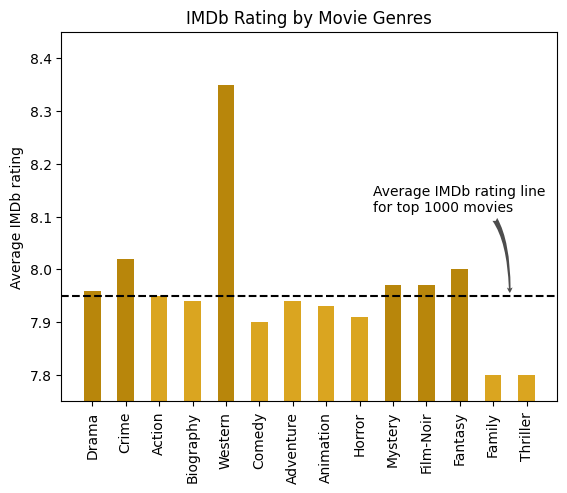

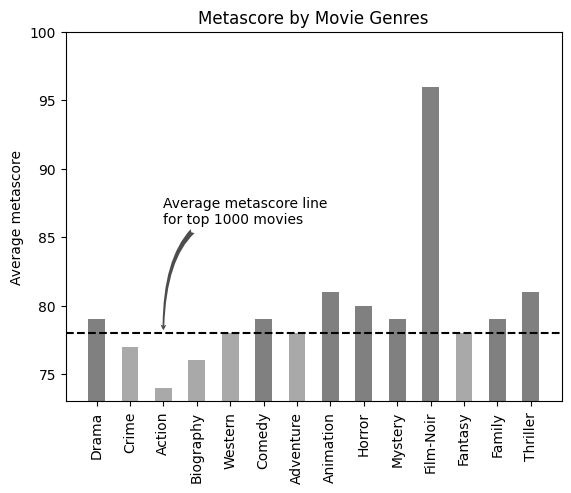

In [11]:
import matplotlib.pyplot as plt

# Bar chart for IMDB Rating breakdown per Genre
positions= range(1,15)

color_imdb_chart = []
for value in genre_and_avg_imdb_rating.values():
    if value > average_IMDB_rating:
        color_imdb_chart.append('darkgoldenrod')
    else:
        color_imdb_chart.append('goldenrod')
# With the color list above, the values greater than the average become darker in the chart

plt.bar(positions,genre_and_avg_imdb_rating.values(),width=0.5,color=color_imdb_chart)
plt.ylim(7.75,8.45)
plt.ylabel('Average IMDb rating')
plt.title('IMDb Rating by Movie Genres')
plt.xticks(positions,genre_list,rotation=90)
plt.axhline(y=average_IMDB_rating, color='black',linestyle='dashed')
plt.annotate('Average IMDb rating line\nfor top 1000 movies',(13.5,average_IMDB_rating),(9.4,average_IMDB_rating+.16),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()


# ---------- The Second Bar -------------

# Bar chart for Metascore breakdown per Genre
positions= range(1,15)

color_metascore_chart = []
for value in genre_and_avg_metascore_rating.values():
    if value > average_metascore:
        color_metascore_chart.append('grey')
    else:
        color_metascore_chart.append('darkgrey')
# With the color list above, the values greater than the average become darker in the chart

plt.bar(positions,genre_and_avg_metascore_rating.values(),width=0.5,color=color_metascore_chart)
plt.xticks(positions,genre_list,rotation=90)
plt.ylabel('Average metascore')
plt.title('Metascore by Movie Genres')
plt.axhline(y=average_metascore, color='black',linestyle='dashed')
plt.ylim(73,100)
plt.annotate('Average metascore line\nfor top 1000 movies',(3,average_metascore),(3,average_metascore+8),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

## Report

### Problem Statement:
Analysis of highest rated film genres based on IMDb ratings: A comparison between public opinion and critic insights

### Analysis

IMDb is the most popular platform among film enthusiasts and critics. With a low entry barrier, anyone can rate and review films and impact the overall score and acceptance. Metacritic, with a high entry barrier, only accepts reviews from reputed critics. IMDb scores reflect popular opinion, albeit it can have personal biases. Metascore from Metacritic is generally considered unbiased and judges more critical aspects of the films.
In this study, we used the dataset consisting of top 1000 films based on their IMDb ratings as our sample. Drama films claimed the highest number of positions among them with an average IMDb rating of 7.96. However, with the highest average IMDb rating of 8.35, Western films claimed 88 places. Contrarily, Film-Noir films were favoured most by the Metacritic followed by Thriller, Animation and Horror. The sheer contrast of accolade is visible in the charts.
To conclude, public opinion may not always reflect the fundamental characteristics of films as an artform as it does in Metascore. The most preferred genres based on IMDb ratings are Western, Crime, Fantasy and Drama, and perhaps streaming services should be mindful of public preferences while selecting what to offer.